# Lab 1
## Gradient Descent for Linear Regression

In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def mean_std_cols(data):
    """
    Calculates and returns mean and standard deviation of each features as an array of a dataframe

    """
    cols = [col for col in data.columns]
    mean = []
    std = []
    for col in cols:
        mean.append(np.mean(data.loc[:,col]))
        std.append(np.std(data.loc[:,col]))
    return mean, std


In [3]:
def z_score_normalisation(x, mean, std):
    """
    Returns a z-score normalised dataframe 
    """
    cols = [col for col in x.columns]
    norm_x = pd.DataFrame()
    mean_ = std_= 0
    norm_func = lambda x: (x-mean_)/std_ 
    for i,col in enumerate(cols):
        mean_ = mean[i]
        std_ = std[i]
        norm_x[col] = x[col].apply(norm_func)
    return norm_x

In [4]:
def gdtrain(x,y,w,lr,tol):
   
    """
    Gradient Descent Algrithm with 50000 epochs
    x-Training dataset;y-Training labels;w-Weights;
    lr-Learning Rate;tol-Tolerance(RMSE)
    """
    tollist = [0]*50000
    for i in range(50000):
        #print("here")
        f = np.dot(x,w.T)-y
        tollist[i] = np.sqrt(np.mean(f**2))
        dw = 2*np.dot(f.T,x)/len(x)
        if(i==0):
            w = w-lr*dw
        else:
            if(tollist[i-1]-tollist[i]>tol):
                w = w-lr*dw
            else:
                plt.plot(tollist[:i+1])
                plt.show()
                return w
                break

In [5]:
def rmse(x,y,w):
    """
    Calculates the root mean square error 
    """
    y_hat = x.dot(w.T)
    return (np.sqrt(np.mean((y_hat-y)**2)))

In [6]:
def pipeline(x,lr,tol):
    """
    function that will does all the major steps for calculating and obtaining the weights using gradient descent
    """
    # Splitting into 70% train data and 30% test data
    x_train = x.sample(frac = 0.7,random_state = 9)
    #Creating test data from the remaining data
    x_test = x.drop(x_train.index)
    # Getting the labels for train data
    y_train = x_train.pop('Y')
    # Getting the labels for test data
    y_test = x_test.pop('Y')
    # Getting mean and standard deviation from the train data
    x_mean, x_std = mean_std_cols(x_train)
    # Normalisation of the datasets with the mean and standard deviation
    x_train_norm = z_score_normalisation(x_train,x_mean,x_std)
    x_test_norm = z_score_normalisation(x_test,x_mean,x_std)
    # Adding a column of ones to capture the regression intercept
    x_train_norm['reg_intercept'] = 1
    x_test_norm['reg_intercept'] = 1
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    # Initialising the weights with zeros 
    w = np.zeros((1,x_train_norm.shape[1]))
    # Calculating the weights using gradient descent with the given learning rate and tolerance
    w_trained = gdtrain(x_train_norm,y_train,w,lr,tol)
    # Calculating the weights using the normal equations 
    w_Ne = (np.linalg.inv(x_train_norm.T.dot(x_train_norm)).dot(x_train_norm.T)).dot(y_train)
    # Calculating the RMSE of both the weights  
    rmse_grad = rmse(x_test_norm,y_test,w_trained)[0]
    rmse_ne = rmse(x_test_norm,y_test,w_Ne.T)[0]
    print (f'RMSE for trained weights: {rmse_grad:.2f}'+'\n'+f'RMSE for normal equation weights: {rmse_ne:.2f}')

In [7]:
def exp(data):
    """
    Iterates through the list of learning rate and tolerance list
    """
    lr_list = [0.1,0.05,0.01]
    tol_list = [0.1,0.05,0.01]
    for lr_ in lr_list:
        for tol_ in tol_list:
            plt.title(f'Error vs No. of Iterations (learning rate = {lr_} and tolerance = {tol_})')
            pipeline(data,lr_,tol_)
            print ('==============================================================')

### Estimating the regression coefficients over iterations while using the given set of parameters
#### (a) Housing: learning rate = 0.4 × 10^−3, tolerance = 0.5 × 10^−2

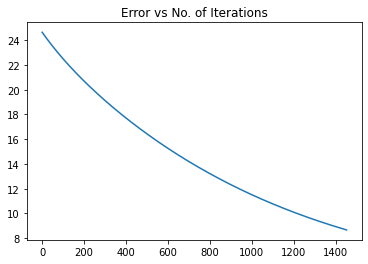

RMSE for trained weights: 9.10
RMSE for normal equation weights: 5.50


In [8]:
house = pd.read_csv('housing.csv')
house_lr = 0.4*(10**-3)
house_tol = 0.5*(10**-2)
plt.title('Error vs No. of Iterations')
pipeline(house,house_lr,house_tol)

#### (b) Yacht: learning rate = 0.7 × 10^−3, tolerance = 0.1 × 10^−3

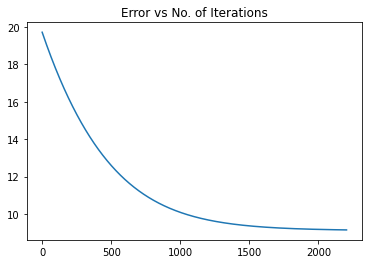

RMSE for trained weights: 8.22
RMSE for normal equation weights: 8.45


In [9]:
yacht = pd.read_csv('yachtData.csv')
yacht_lr = 0.7 * (10**-3)
yacht_tol = 0.1 * (10**-3)
plt.title('Error vs No. of Iterations')
pipeline(yacht,yacht_lr,yacht_tol)

#### (c) Concrete: learning rate = 0.1 × 10^−2, tolerance = 0.1 × 10^−2

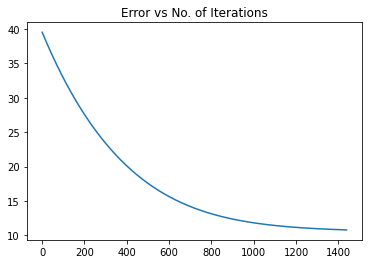

RMSE for trained weights: 11.35
RMSE for normal equation weights: 10.70


In [10]:
concrete = pd.read_csv('concreteData-1.csv')
concrete_lr = 0.1*(10**-2)
concrete_tol = 0.1*(10**-2)
plt.title('Error vs No. of Iterations')
pipeline(concrete,concrete_lr,concrete_tol)

### Experimenting with other learning rates and tolerances - 0.1, 0.05, 0.01 
#### (a) Housing

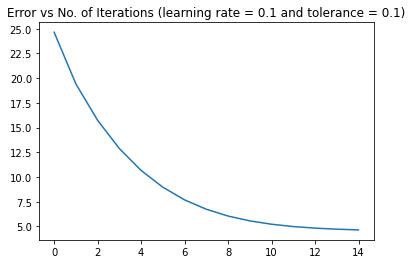

RMSE for trained weights: 5.64
RMSE for normal equation weights: 5.50


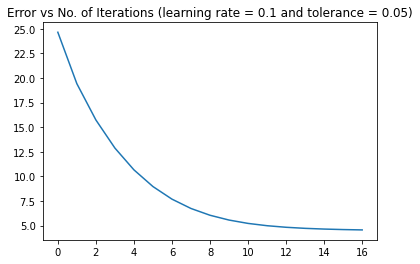

RMSE for trained weights: 5.58
RMSE for normal equation weights: 5.50


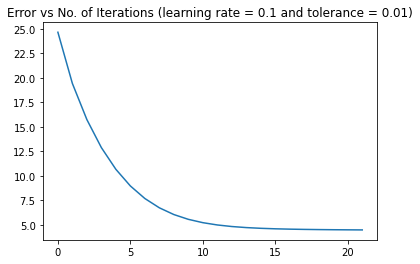

RMSE for trained weights: 5.53
RMSE for normal equation weights: 5.50


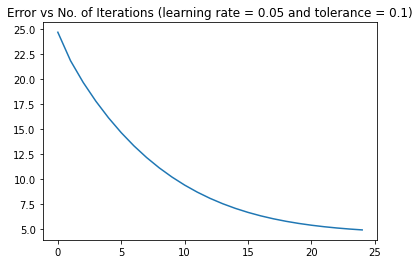

RMSE for trained weights: 5.85
RMSE for normal equation weights: 5.50


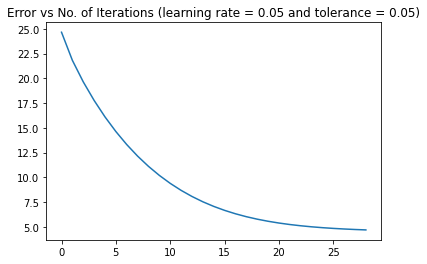

RMSE for trained weights: 5.67
RMSE for normal equation weights: 5.50


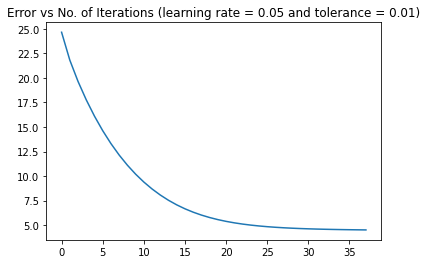

RMSE for trained weights: 5.55
RMSE for normal equation weights: 5.50


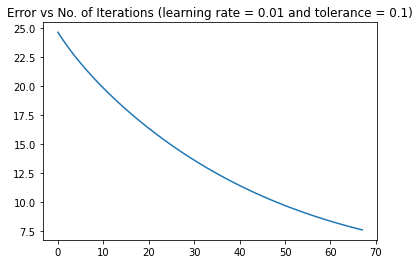

RMSE for trained weights: 8.14
RMSE for normal equation weights: 5.50


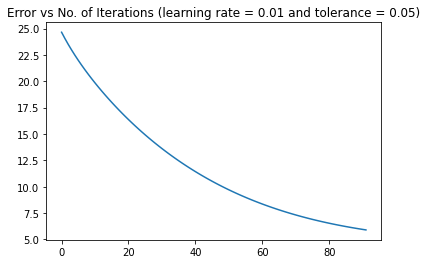

RMSE for trained weights: 6.66
RMSE for normal equation weights: 5.50


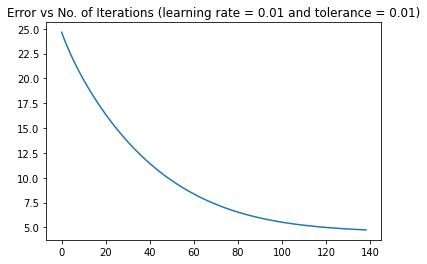

RMSE for trained weights: 5.73
RMSE for normal equation weights: 5.50


In [11]:
exp(house)

#### (b) Yacht

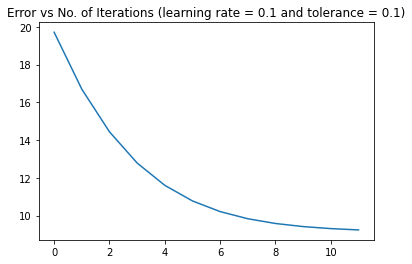

RMSE for trained weights: 8.07
RMSE for normal equation weights: 8.45


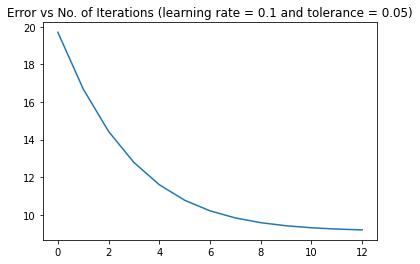

RMSE for trained weights: 8.12
RMSE for normal equation weights: 8.45


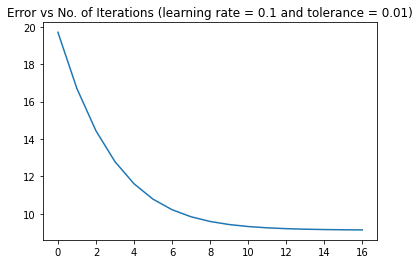

RMSE for trained weights: 8.29
RMSE for normal equation weights: 8.45


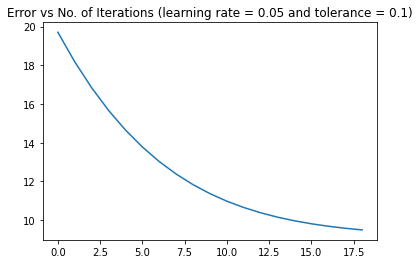

RMSE for trained weights: 7.94
RMSE for normal equation weights: 8.45


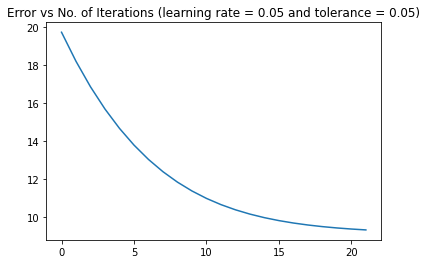

RMSE for trained weights: 8.01
RMSE for normal equation weights: 8.45


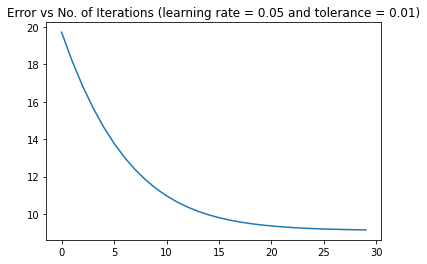

RMSE for trained weights: 8.21
RMSE for normal equation weights: 8.45


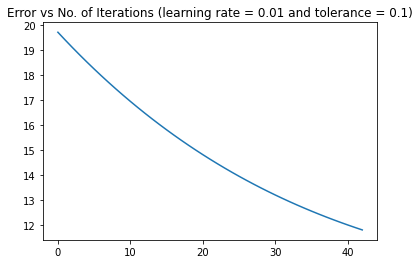

RMSE for trained weights: 8.79
RMSE for normal equation weights: 8.45


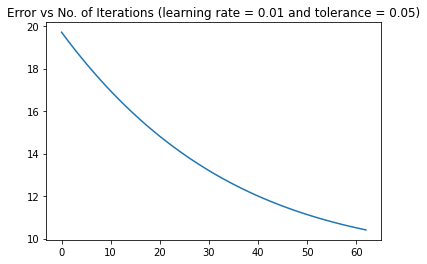

RMSE for trained weights: 8.08
RMSE for normal equation weights: 8.45


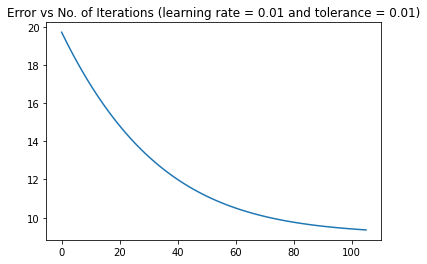

RMSE for trained weights: 7.98
RMSE for normal equation weights: 8.45


In [12]:
exp(yacht)

#### (c) Concrete

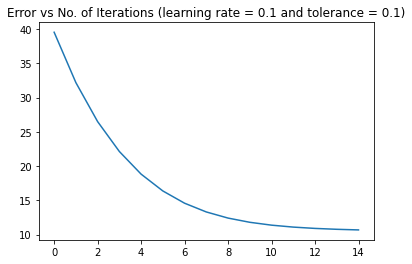

RMSE for trained weights: 11.26
RMSE for normal equation weights: 10.70


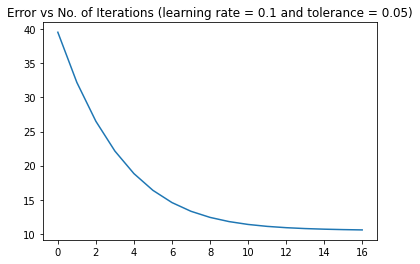

RMSE for trained weights: 11.13
RMSE for normal equation weights: 10.70


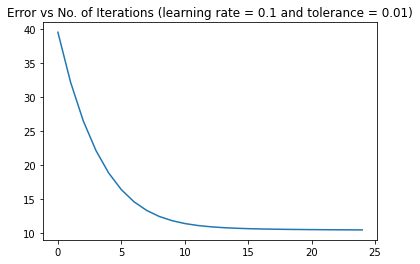

RMSE for trained weights: 10.96
RMSE for normal equation weights: 10.70


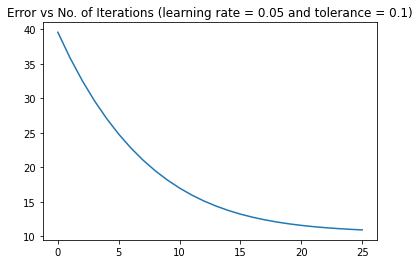

RMSE for trained weights: 11.52
RMSE for normal equation weights: 10.70


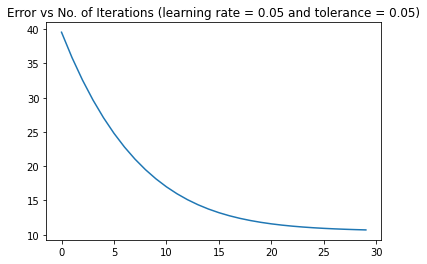

RMSE for trained weights: 11.27
RMSE for normal equation weights: 10.70


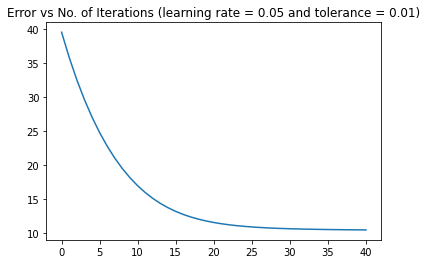

RMSE for trained weights: 11.03
RMSE for normal equation weights: 10.70


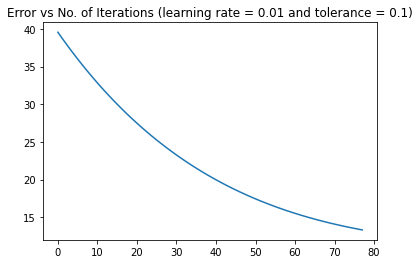

RMSE for trained weights: 13.94
RMSE for normal equation weights: 10.70


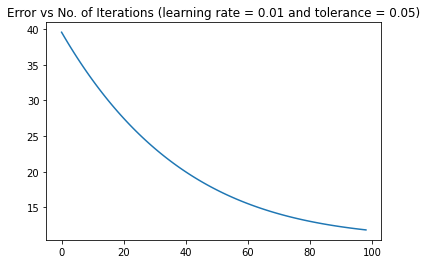

RMSE for trained weights: 12.47
RMSE for normal equation weights: 10.70


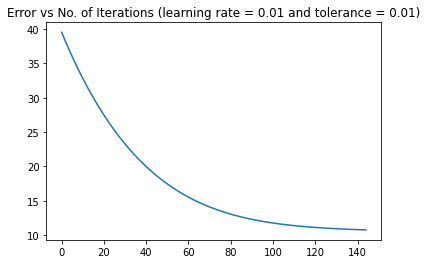

RMSE for trained weights: 11.33
RMSE for normal equation weights: 10.70


In [13]:
exp(concrete)